In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima

In [224]:
data = pd.read_csv("../../datas/IEA Global EV Data 2024 new.csv", header = 0, delimiter = ",")
data.head()

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   region      12654 non-null  object
 1   category    12654 non-null  object
 2   parameter   12654 non-null  object
 3   mode        12654 non-null  object
 4   powertrain  12654 non-null  object
 5   year        12654 non-null  int64 
 6   unit        12654 non-null  object
 7   value       12654 non-null  object
 8   percentage  12654 non-null  object
dtypes: int64(1), object(8)
memory usage: 889.9+ KB


In [226]:
data['percentage'] = data['percentage'].str.replace(',', '').str.replace('%', '').astype(float)
data['value'] = data['value'].str.replace(',', '').str.replace('.', '', regex=False)
data['value'] = pd.to_numeric(data['value'], errors='coerce')

In [227]:
data_group = data[["year", "value"]]

In [228]:
data_group = data_group.groupby("year").sum()

In [229]:
data_group.index = pd.to_datetime(data_group.index, format = "%Y")

<Axes: xlabel='year'>

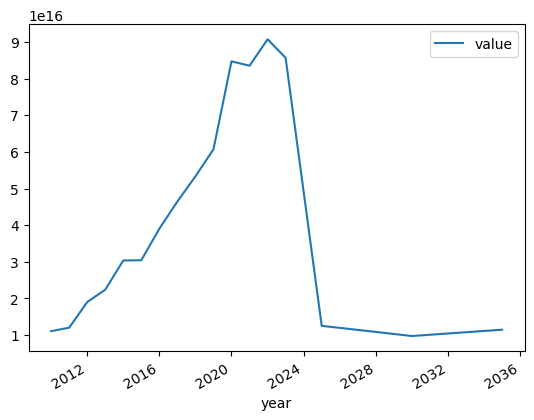

In [230]:
data_group.plot()

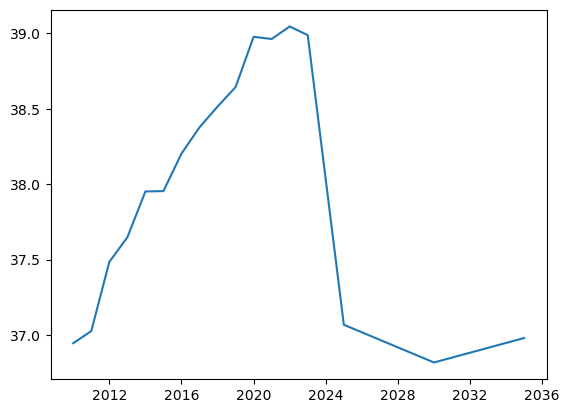

In [231]:
data_group = np.log(data_group)
plt.plot(data_group)
plt.show()

In [232]:
adfuller(data_group)

(-3.0631320388842456,
 0.029404643268910752,
 5,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 17.932352553737427)

In [233]:
# data_group_diff_1 = data_group.diff().dropna()
# plt.plot(data_group_diff_1)

print(adfuller(data_group))

(-3.0631320388842456, 0.029404643268910752, 5, 11, {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}, 17.932352553737427)


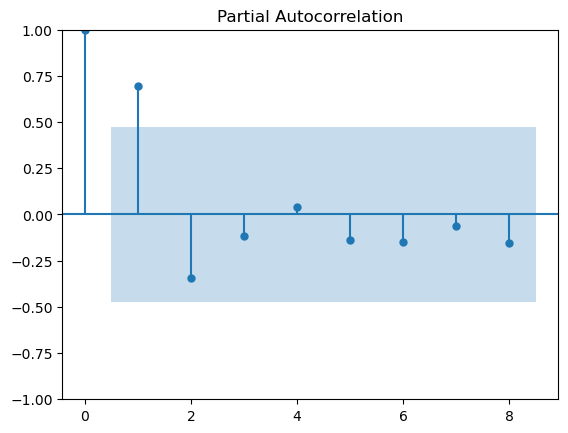

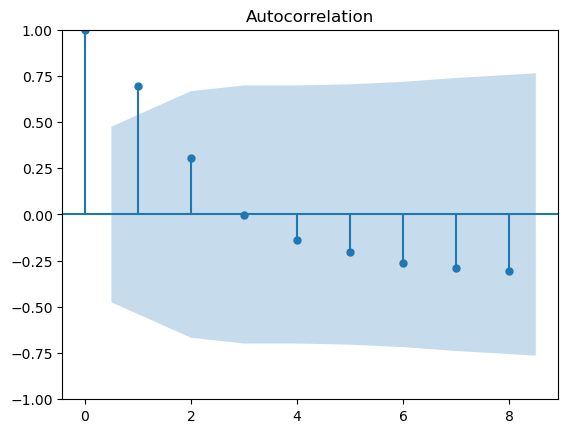

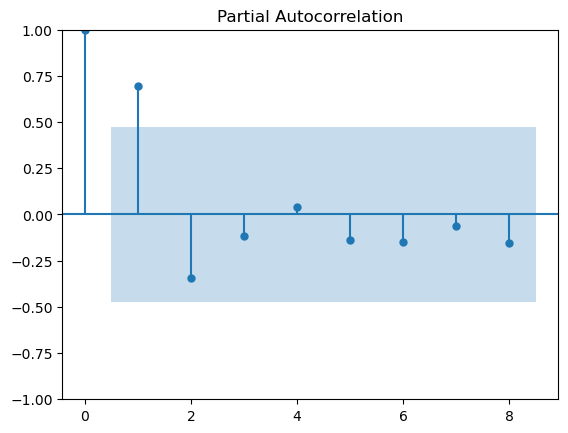

In [234]:
plot_acf(data_group)
plot_pacf(data_group)

In [235]:
model_fit = ARIMA(data_group, order = (2, 0, 2)).fit()

C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

<Axes: xlabel='year'>

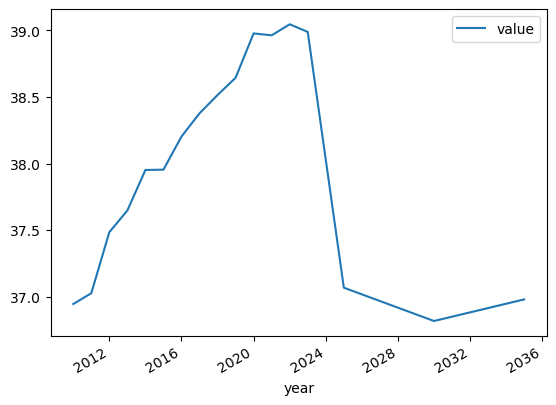

In [236]:
data_group.plot()

In [237]:
data_group.index[-1]

Timestamp('2035-01-01 00:00:00')

C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\1654558395.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=data_group.index[0] + pd.DateOffset(years = 1), periods=forecast_step, freq='Y')


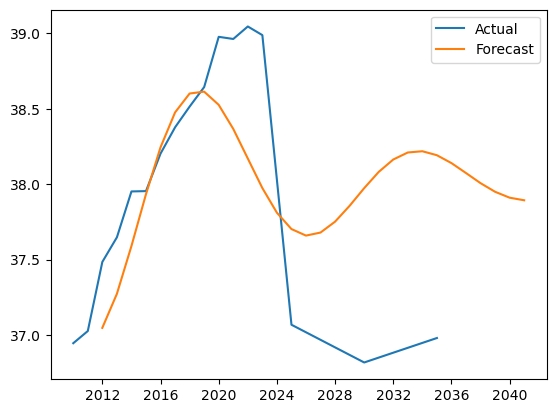

In [238]:
forecast_step = 30
forecast = model_fit.forecast(steps = forecast_step)
forecast_index = pd.date_range(start=data_group.index[0] + pd.DateOffset(years = 1), periods=forecast_step, freq='Y')

plt.plot(data_group, label = "Actual")
plt.plot(forecast_index, forecast, label = "Forecast")
plt.legend()
plt.show();